In [27]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import statsmodels.api as sm
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def fileNAME(patH,name):
    import glob
    folder_path = patH
    search_term = name   # "glaciers"  # replace with the word you want to search for
    file_pattern = f"{folder_path}/*{search_term}*"  # create a pattern to match files containing the search term
    matching_files = glob.glob(file_pattern)
    if len(matching_files)>1: 
        raise ValueError("There are 2 files with same keyword")
    fnme = os.path.basename(matching_files[0])
    return fnme


In [ ]:
component="vertical"
wf="wf_1e"
ssp='ssp585';       
folder='full_sample_workflows'
loc=0

pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

fileG=fileNAME(pathG,component)
fileP=fileNAME(pathP,component)
var='sea_level_change'



d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]
#
yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]
#         
latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]
#
# Select var
slcG=d_ncG[var][:, 1, loc];       slcP=d_ncP[var][:, 1, loc]


fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot_2samples(slcG, slcP, line='45', ax=ax)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sm.qqplot(slcG, line='s', ax=axes[0])

sm.qqplot(slcP, line='s', ax=axes[1])


plt.tight_layout()
plt.show()


## <font> ------------------------ </font>

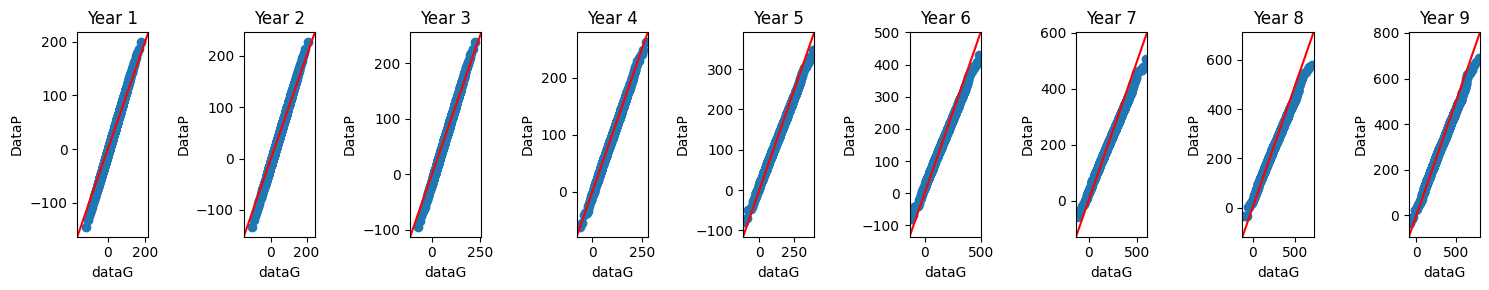

In [35]:
component="ocean"
wf="wf_1e"
ssp='ssp585';       
folder='full_sample_workflows'
loc=0
pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
fileG=fileNAME(pathG,component)
fileP=fileNAME(pathP,component)
var='sea_level_change'
d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]
#
yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]
#         
latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]
#
# Select var
slcG=d_ncG[var][:, yrIDX_G, loc];       slcP=d_ncP[var][:, yrIDX_P, loc]
num_cols = d_ncG[var][:,yrIDX_G, loc].shape[1]
num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))
# loop over each year.
for col in range(num_cols):
    # Select var
    varG=slcG[:, col];       
    varP=slcP[:, col]
    #
    sm.qqplot_2samples(varG, varP, line='45', ax=axes[col])
    axes[col].set_xlabel('dataG')
    axes[col].set_ylabel('DataP')
    axes[col].set_title(f'Year {col+1}')
plt.tight_layout()
plt.show()